In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

df = pd.read_csv("framingham.csv")
#check if the dataset is loaded
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

  Initial Analysis

In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
df.duplicated().sum()

0

Exploratory Data Analysis

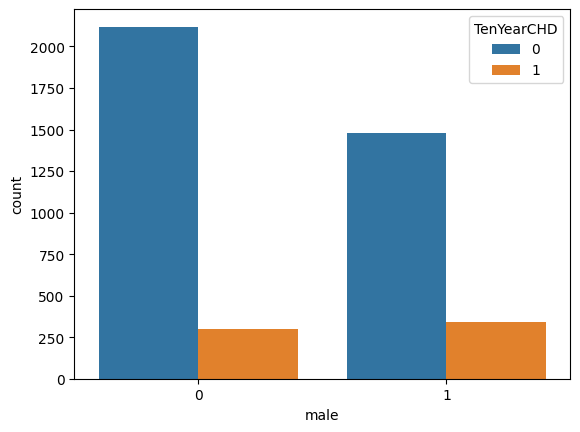

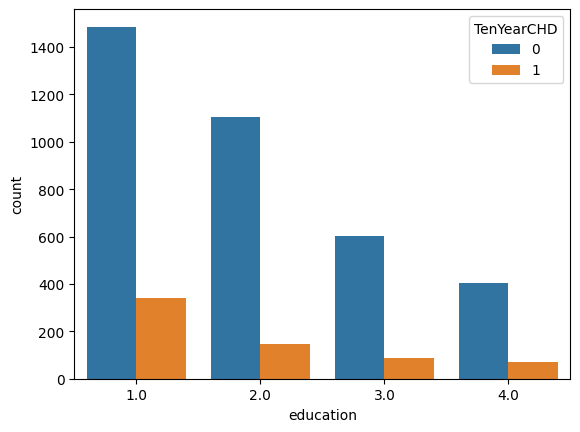

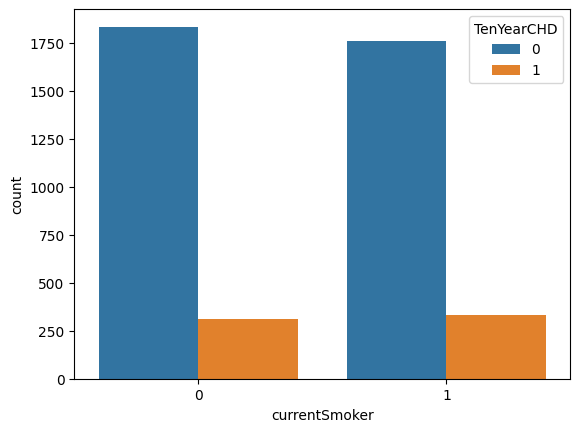

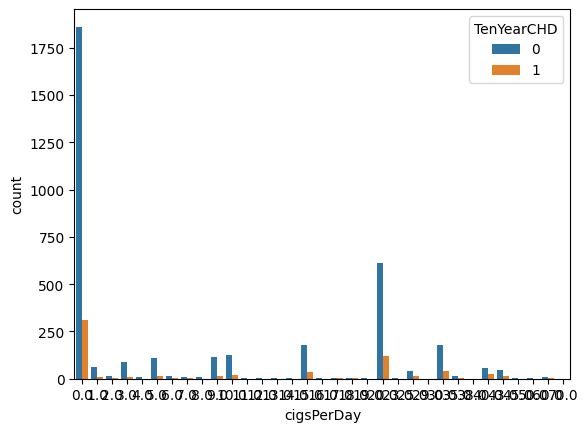

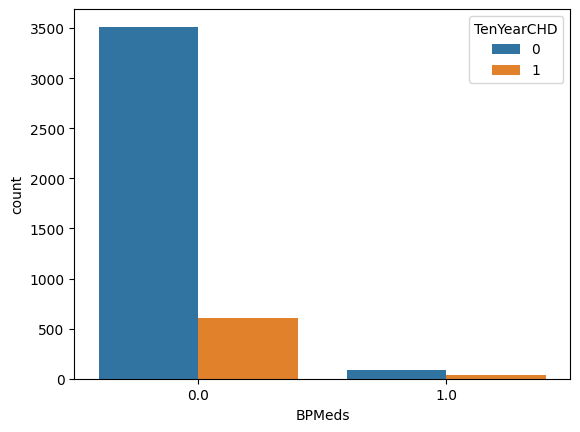

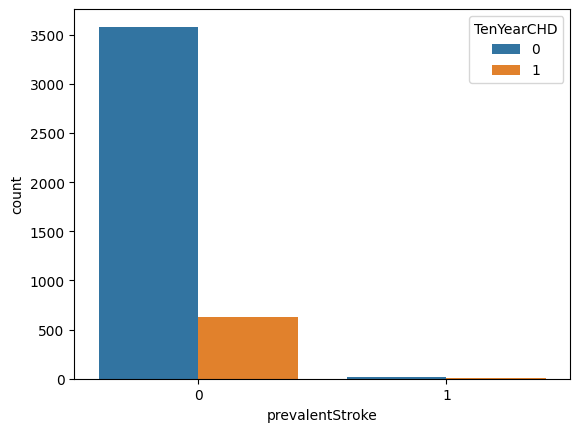

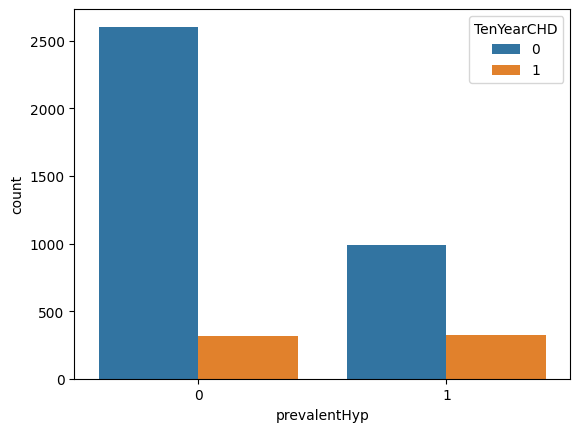

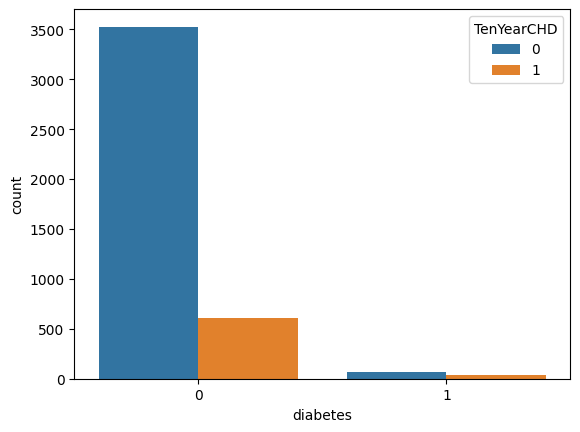

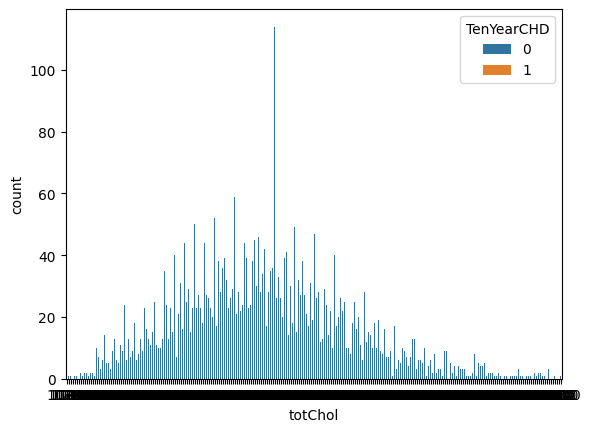

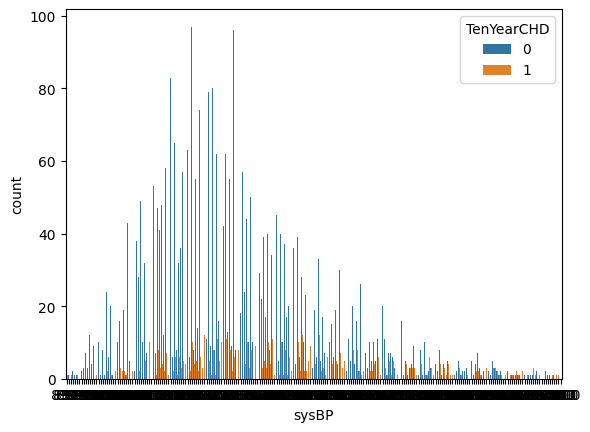

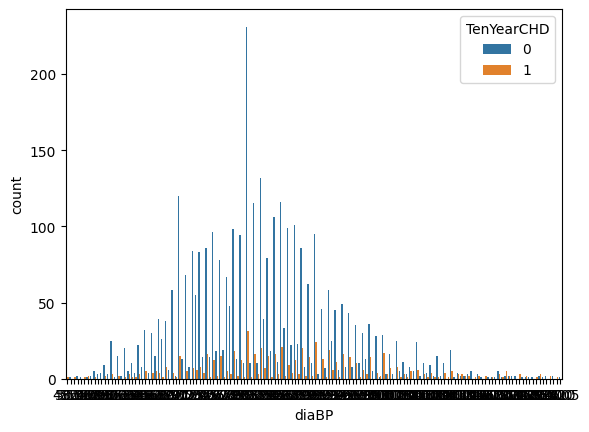

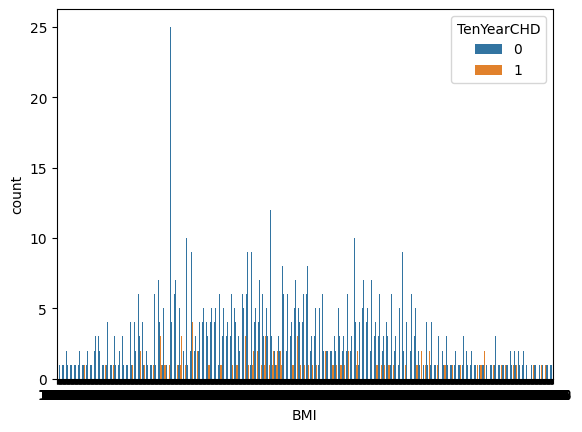

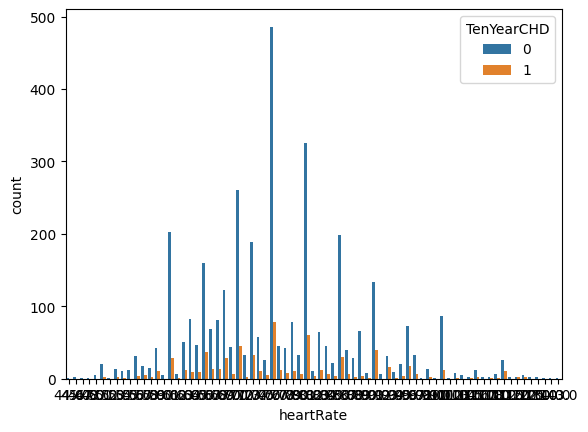

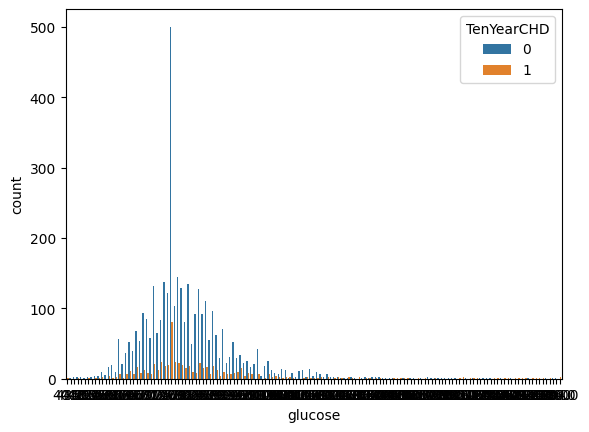

In [ ]:
df_cat_attributes = [col for col in df.columns if col != "age" and col!='TenYearCHD']
for attr in df_cat_attributes:
  sns.countplot(x =attr, hue = "TenYearCHD", data = df)
  plt.show()
  plt.show()


Data Preprocessing

In [ ]:
X=df.drop(columns=['TenYearCHD'])
y=df['TenYearCHD']

In [ ]:
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [ ]:
print(num_before,num_after)

{0: 3596, 1: 644} {0: 3595, 1: 2876}


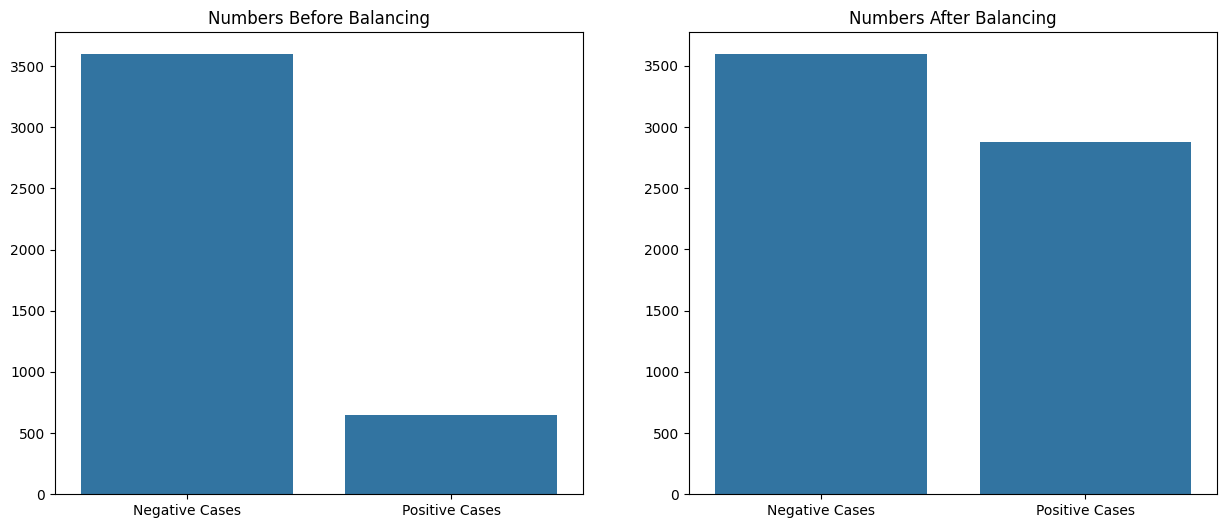

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [ ]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3642,1,48,4.0,0,0.0,0.0,0,0,0,240.0,136.0,95.5,26.36,75.0,73.0,0
2337,0,42,2.0,1,9.0,0.0,0,0,0,281.0,115.5,79.0,22.90,80.0,71.0,0
740,0,61,1.0,1,6.0,0.0,0,1,0,290.0,178.0,91.0,28.87,110.0,80.0,0
2444,0,54,2.0,0,0.0,0.0,0,0,0,253.0,127.0,68.5,22.54,70.0,76.0,0
1040,1,58,1.0,1,20.0,0.0,0,1,0,192.0,143.0,98.0,29.01,90.0,68.0,0


In [ ]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate
3642,1,48,4.0,0,0.0,0.0,0,0,0,240.0,136.0,95.5,26.36,75.0
2337,0,42,2.0,1,9.0,0.0,0,0,0,281.0,115.5,79.0,22.90,80.0
740,0,61,1.0,1,6.0,0.0,0,1,0,290.0,178.0,91.0,28.87,110.0
2444,0,54,2.0,0,0.0,0.0,0,0,0,253.0,127.0,68.5,22.54,70.0
1040,1,58,1.0,1,20.0,0.0,0,1,0,192.0,143.0,98.0,29.01,90.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5176, 14)
(5176,)
(1295, 14)
(1295,)


In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train=pd.DataFrame(X_train_scaled)
X_test=pd.DataFrame(X_test_scaled)

In [ ]:
param_grid = {
    'n_estimators': [25, 30, 40, 50, 75, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [8, 9, 10, 11, 12],
    'criterion' :['gini', 'entropy']
}
randfor = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
randfor.fit(X_train, y_train)

print(randfor.best_params_)


{'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 150}


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       734
           1       0.88      0.79      0.83       561

    accuracy                           0.86      1295
   macro avg       0.87      0.85      0.86      1295
weighted avg       0.86      0.86      0.86      1295



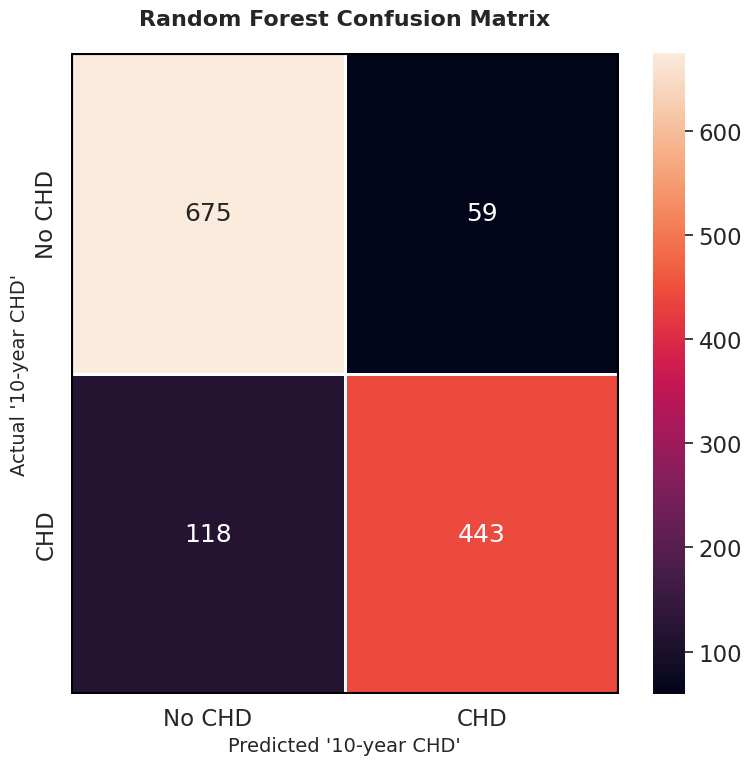

In [ ]:
y_pred_randfor = randfor.predict(X_test)

print(classification_report(y_test, y_pred_randfor))

confusion_randfor = confusion_matrix(y_test, y_pred_randfor)

with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))

    class_labels = ["No CHD", "CHD"]
    sns.heatmap(confusion_randfor, annot=True, fmt="d", cmap='rocket', linewidths=2, xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Random Forest Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted '10-year CHD'", fontsize=14)
    ax.set_ylabel("Actual '10-year CHD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=confusion_randfor.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=confusion_randfor.shape[1], color='black', linewidth=3)

    # Improve layout
    plt.tight_layout()
    plt.show()


In [ ]:
randfor_recall_score = recall_score(y_test, y_pred_randfor, labels=[1])
randfor_avg_recall_score = recall_score(y_test, y_pred_randfor, average="weighted")
print(f"Random Forest Classifier Recall ('YES'): {randfor_recall_score}")

Random Forest Classifier Recall ('YES'): 0.7896613190730838
